# Grocery Store Model

## Import Libraries

In [1]:
import pandas as pd
from pathlib import Path
from IPython.display import Image
import matplotlib.pyplot as plt

#Import from created .py script
from grocerystore import process_sim_output

In [2]:
#Refresh libraries
%reload_ext autoreload
%autoreload 2

In [3]:
#Matplotlib Magic Command
%matplotlib inline

## About the model
### Overview
This project uses the SimPy environment to model a basic grocery store. 
The entities for this model are customers. The model maps the customers’ trip through the grocery store, records key time stamps, and performs some basic preprocessing. 
### Customers Arrive and Get A Cart
Customers arrive according to an exponential distribution. Once a customer enters the store, they request a cart. If a cart is unavailable, the customer must wait. This time it takes customers to pull a cart is uniform distribution. The customer keeps the cart resource until they exit the system.
Each customer has a set time it takes them to decide pick one item and walk to the next location. This is based on a normal distribution. The default estimates for this distribution are logical but not based on actual data. 
### The Departments
Customers pick items from three departments. The number of items from each department is governed by a normal distribution. The distribution is post processed to round to the nearest integer and floor negative numbers at zero.  
* Produce
    * The total time in the produce department is the product of the time it takes to pick an item and the number of produce items. 
* Butcher
	* Only a limited percentage of customers need to see the butcher. If a customer doesn’t need to see the butcher, they skip this step and go directly to produce. Customers that do need to see the butcher request the resource. If one is unavailable, they must wait. The time the butcher requires to process the an item is a log-normal distribution. The total time at the butcher station is the sum of the time it takes a customer to pick and a butcher to process an item times the number of items. The mean of the number of items from the butcher is the lowest of all three departments.
* Pantry
    * The pantry department is very similar to produce. There are no constrained resources. The mean is slightly higher than the produce department. The time in the pantry department is the product of number of items and the time it takes to pick one item.
### The Checkout
After customers finish selecting all their items, they go request a cashier to checkout. If a cashier is unavailable, the customer must wait. The cashier’s processing time per item is a log-normal distribution. The scanning time per item is unique for each customer. I struggled to find default statistics to make this distribution logical, so I added it to the summary statistics. My initial attempt had some cashiers spending five minutes per item. [This site]( https://homepage.divms.uiowa.edu/~mbognar/applets/lognormal.html) from the University of Iowa allowed me to try several distributions until I found the correct probability. A negative mean for the log-normal cashier distribution was key. The time at the cashier is the product if total number of items and the cashier’s scanning time per item. 
### Exit the System
Once the checkout is complete, the customer releases the cashier and their cart and exits the system.

### Further Extensions
This is just an introductory model of a grocery store. There are several steps this model could take to be more realistic and useful. 
* Change the model to account for customer variations in time of day and day of the week
* Set a mean scanning time for each cashier that holds throughout the model
* Create more departments to add specificity to the model
* Account for restocking needs



## Visualize the Model

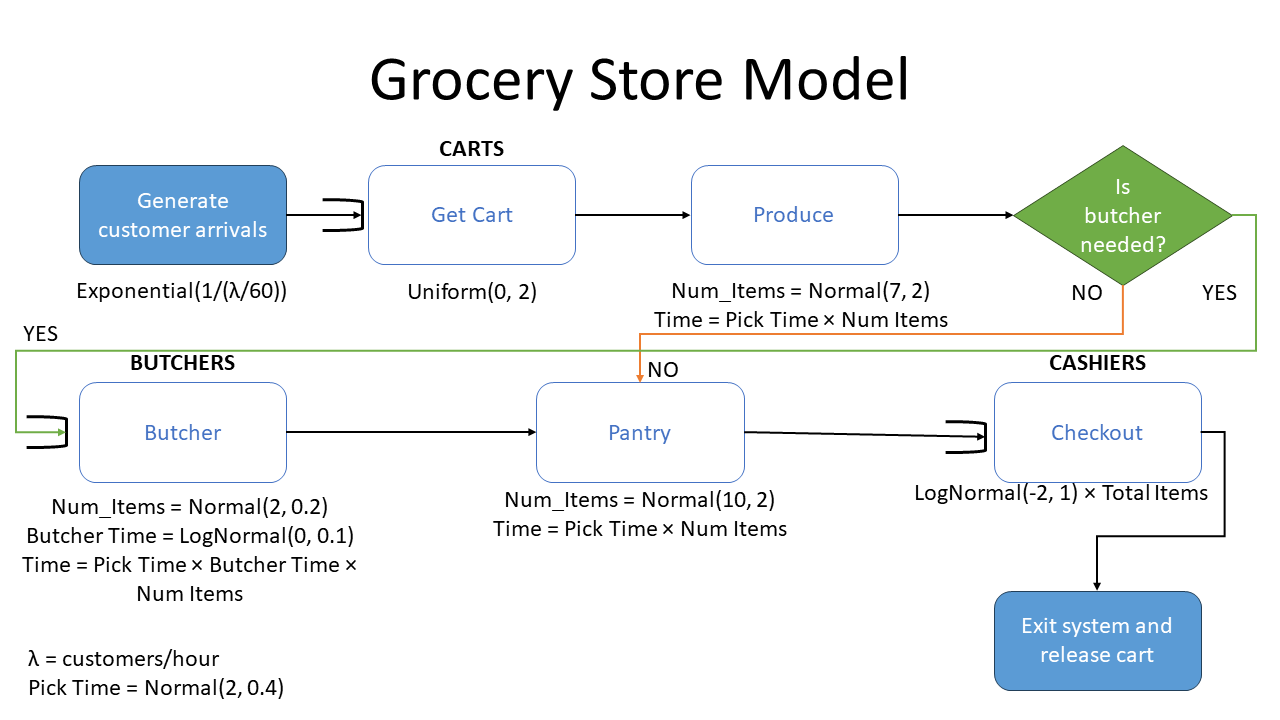

In [4]:
Image("images/Visualize_Model.png")

## Running Model
Now, let's run the model. I used the [vaccine clinic model from misken](http://www.sba.oakland.edu/faculty/isken/courses/mis6900_s22/mod4_des_simpy.html) as a base. I changed the model to fit my grocery store as described above. Additionally, I made the resulting performance metrics an input for for the process_sim_output package. This input is not in the config file, but if a user installs the package the analyzed metrics can change. Running this separately also requires some clarification of the wildcards in file names and moving the `unlink()` statement to the main function. Otherwise the program deletes the inputs required to for `process_sim_output()`.

In [5]:
#Run the model with config files using command line prompts
!python ../src/grocerystore/grocerystore.py --config ../src/grocerystore/input/base.cfg

Namespace(butcher_mean=2.0, butcher_sd=0.2, butcher_time_mean=0.0, butcher_time_sigma=0.1, cashier_time_mean=-2.0, cashier_time_sigma=1.0, config=None, customer_arrival_rate=150.0, get_cart_max=2.0, num_butchers=1, num_carts=300, num_cashiers=12, num_reps=10, output_path='output', pantry_mean=10.0, pantry_sd=2.0, pct_need_butcher=0.2, pick_time_mean=2.0, pick_time_sd=0.4, produce_mean=7.0, produce_sd=2.0, quiet=True, scenario='base', seed=8842, stoptime=1080.0)
2749 customers processed.
Simulation replication 1 ended at time 1151.2890378468242
2720 customers processed.
Simulation replication 2 ended at time 1130.510406579599
2737 customers processed.
Simulation replication 3 ended at time 1138.1336307019055
2737 customers processed.
Simulation replication 4 ended at time 1134.7201874556986
2719 customers processed.
Simulation replication 5 ended at time 1130.467771354635
2697 customers processed.
Simulation replication 6 ended at time 1151.9634296556903
2766 customers processed.
Simula

In [6]:
!python ../src/grocerystore/grocerystore.py --config ../src/grocerystore/input/base_150c1b18c.cfg

Namespace(butcher_mean=2.0, butcher_sd=0.2, butcher_time_mean=0.0, butcher_time_sigma=0.1, cashier_time_mean=-2.0, cashier_time_sigma=1.0, config=None, customer_arrival_rate=150.0, get_cart_max=2.0, num_butchers=1, num_carts=150, num_cashiers=18, num_reps=10, output_path='output', pantry_mean=10.0, pantry_sd=2.0, pct_need_butcher=0.2, pick_time_mean=2.0, pick_time_sd=0.4, produce_mean=7.0, produce_sd=2.0, quiet=True, scenario='base_150c1b18c', seed=8842, stoptime=1080.0)
2682 customers processed.
Simulation replication 1 ended at time 1172.9374612795525
2726 customers processed.
Simulation replication 2 ended at time 1139.300800674792
2645 customers processed.
Simulation replication 3 ended at time 1133.7488235402195
2602 customers processed.
Simulation replication 4 ended at time 1135.89041743905
2710 customers processed.
Simulation replication 5 ended at time 1168.6063424192814
2705 customers processed.
Simulation replication 6 ended at time 1133.6811646329063
2740 customers processe

## Process Output

In [7]:
#Read in CSV files created from running the model
customer_log_df_base = pd.read_csv('output/consolidated_store_customer_log_base.csv')
customer_log_df_150c1b18c = pd.read_csv('output/consolidated_store_customer_log_base_150c1b18c.csv')

### Summary Statistics
Ths approach is similar to the `groupby()` and `describe()` method used in class. However, it is allows multiple columns to run at the same time. All of the group by results write to a dictionary so they can be pulled out easily for anaysis or graphing. The dictionary also contains a summary for all statistics of interests.

In [8]:
# Inputs for program
performance_metrics = ['num_items', 'wait_for_cart', 'wait_for_butcher', 'wait_for_cashier', 'checkout_time',
                       'time_in_system', 'time_in_system_peritem']
output_path = Path('output')

#Running program
sum_stats_base = process_sim_output(output_path, 'base', performance_metrics)
sum_stats_base_150c1b18c = process_sim_output(output_path, 'base_150c1b18c', performance_metrics)

In [9]:
sum_stats_base['customer_log_ci']

,num_items,wait_for_cart,wait_for_butcher,wait_for_cashier,checkout_time,time_in_system,time_in_system_peritem
n_samples,10.000000,10.0,10.000000,10.000000,10.000000,10.000000,10.000000
mean_mean,17.398011,0.0,4.281564,21.523798,3.861083,40.363886,2.393853
sd_mean,0.029499,0.0,0.793018,0.436378,0.042173,0.445204,0.026723
ci_95_lower,17.379728,0.0,3.790046,21.253328,3.834944,40.087946,2.377289
ci_95_upper,17.416295,0.0,4.773082,21.794268,3.887222,40.639826,2.410416


In [10]:
sum_stats_base_150c1b18c['customer_log_ci']

,num_items,wait_for_cart,wait_for_butcher,wait_for_cashier,checkout_time,time_in_system,time_in_system_peritem
n_samples,10.000000,10.0,10.000000,10.000000,10.000000,10.000000,10.000000
mean_mean,17.375507,0.0,4.146245,21.059457,3.891096,39.934646,2.370955
sd_mean,0.035325,0.0,1.063459,0.213895,0.081380,0.193382,0.013548
ci_95_lower,17.353613,0.0,3.487107,20.926883,3.840657,39.814786,2.362557
ci_95_upper,17.397402,0.0,4.805384,21.192031,3.941536,40.054506,2.379352


#### Similarities
This output shows some interesting insights. Both inputs show the number of items is approximately 17 items. This makes sense as the config files use the same distributions. However, this is an important logic check. It makes sense that the average grocery trip would include 17 items in my opinion.

A similar logic process follows for checkout time. It uses the same distribution, so the statistics are similar for both scenarios. Customers spend approximately 4 minutes at checkout. That appears logical the cashiers are running quite efficiently by these metrics in my opinion.

The scenario average time waiting for the butcher only increases by about 0.14 minutes, or 8.5 seconds. I expect that this change is due to random variation, but that is difficult to diagnosis because the scenarios are changing multiple items at the same time.


#### Differences
The default model clearly has a large excess of carts. The second scenario cuts the number of carts in half, but customers still do not have to wait for this resource. The store can save money by having fewer carts. However, this model does not include the cost associated with hiring employees to collect the cart from the parking lot. The store may want to have more carts so they can make more infrequent collections.

Increasing the number of cashiers by 50% had much smaller benefits to reduce wait time for a cashier and total time in the system than I expected. The scenario means cashier wait time only decreased by about 30 seconds. Customers still are spending 21 minutes on average waiting to check out. I think the wait time is much too high. This challenge of cashier resources may explain why stores are adopting more self-checkouts.

### Graph Output

(array([8.8100e+02, 1.3736e+04, 2.3650e+04, 1.1770e+04, 3.0160e+03,
        7.2600e+02, 1.9900e+02, 5.4000e+01, 2.1000e+01, 1.0000e+00]),
 array([ 2.18253981,  9.60656431, 17.03058882, 24.45461332, 31.87863782,
        39.30266233, 46.72668683, 54.15071133, 61.57473584, 68.99876034,
        76.42278484]),
 <BarContainer object of 10 artists>)

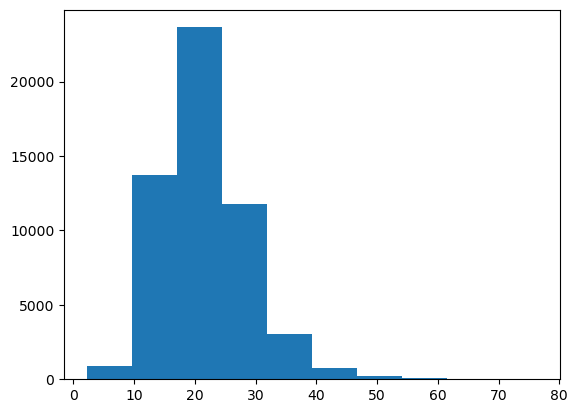

In [16]:
plt.hist(customer_log_df_base['wait_for_cashier'])

In [14]:
sum_stats_base

{'scenario': 'base',
 'customer_log_rep_stats': {'num_items':           count       mean       std  min   25%   50%    75%   max
  rep_num                                                           
  1        5431.0  17.398453  3.011450  7.0  15.0  17.0  19.00  28.0
  2        5446.0  17.434998  2.947676  6.0  15.0  17.0  19.00  28.0
  3        5382.0  17.383686  2.928901  7.0  15.0  17.0  19.00  30.0
  4        5339.0  17.378910  2.964207  7.0  15.0  17.0  19.00  31.0
  5        5429.0  17.407626  2.923834  8.0  15.0  17.0  19.00  29.0
  6        5402.0  17.392447  2.973873  7.0  15.0  17.0  19.00  28.0
  7        5506.0  17.400835  2.940288  7.0  15.0  17.0  19.00  29.0
  8        5460.0  17.392125  2.972533  7.0  15.0  17.0  19.25  30.0
  9        5350.0  17.448972  3.000828  8.0  15.0  17.0  19.00  28.0
  10       5309.0  17.342061  3.023483  4.0  15.0  17.0  19.00  29.0,
  'wait_for_cart':           count  mean  std  min  25%  50%  75%  max
  rep_num                               